<a href="https://colab.research.google.com/github/nahidmaleki/Classification-on-Various-Datasets/blob/main/LR%2CNB%2CKNN%2CSVC(Breast_Cancer_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🎗️ Breast Cancer Classification — Raw → Refined
**Goal**: Build and compare four classification models on the Wisconsin Diagnostic Breast Cancer (WDBC) dataset:

1. Baseline (minimal/no preprocessing) for Logistic Regression, Naive Bayes, kNN, SVM.

2. Full pipeline with robust preprocessing, imbalance handling, and hyperparameter tuning — then compare metrics.

### ⚠️ Note on dataset ethics:
The WDBC dataset contains medical information. Use strictly for education, respect privacy, and avoid clinical claims. Address mild class imbalance and fairness considerations.

### 📌 What you’ll get
* Clean, modular code (utility functions + sklearn
Pipelines).

* Phase A: Baseline models (LR, NB, kNN, SVM).

* Phase B: Impute → scale → select features; class weighting/SMOTE; tuning.

* Model comparison: accuracy, F1, confusion matrices.

* Diagnostics: learning curves, calibration, permutation importance.

# 🔎 Load & inspect WDBC (head · shape · info · describe)
* Load scikit-learn Breast Cancer Wisconsin (Diagnostic) as a DataFrame.

* Map target to readable labels (optional but helpful).

* Quickly check first rows, dataset size, schema, and summary stats.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load as pandas dataframe (feature + numeric 'target')
data = load_breast_cancer(as_frame=True)
df = data.frame

# --- Quick peek & structure ---
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape


(569, 31)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# --- Summary statistics (numeric only) ---
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Check nulls
df.isnull().sum().sum()


np.int64(0)

## 📊 Class balance • 📦 Feature boxplots (subplots) • 🔗 Feature–label correlation

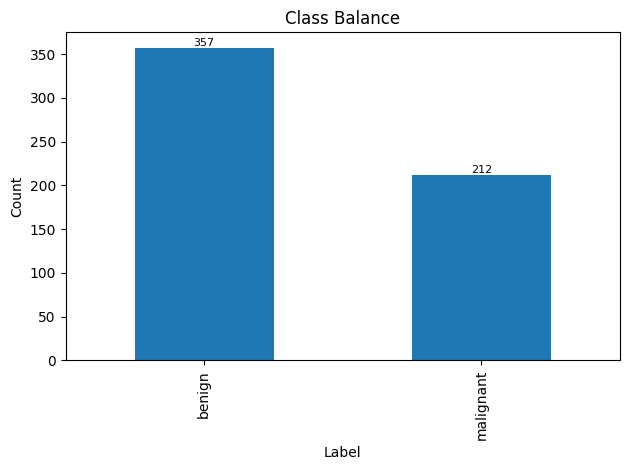

In [ ]:
# Assumes `df` has a 'target' column (e.g., "malignant"/"benign" or 0/1).
import matplotlib.pyplot as plt

ax = df["target"].map({0: "malignant", 1: "benign"}).value_counts().sort_index().plot(kind="bar")
ax.set_title("Class Balance")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

# Add counts on bars (quick sanity check)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
              ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


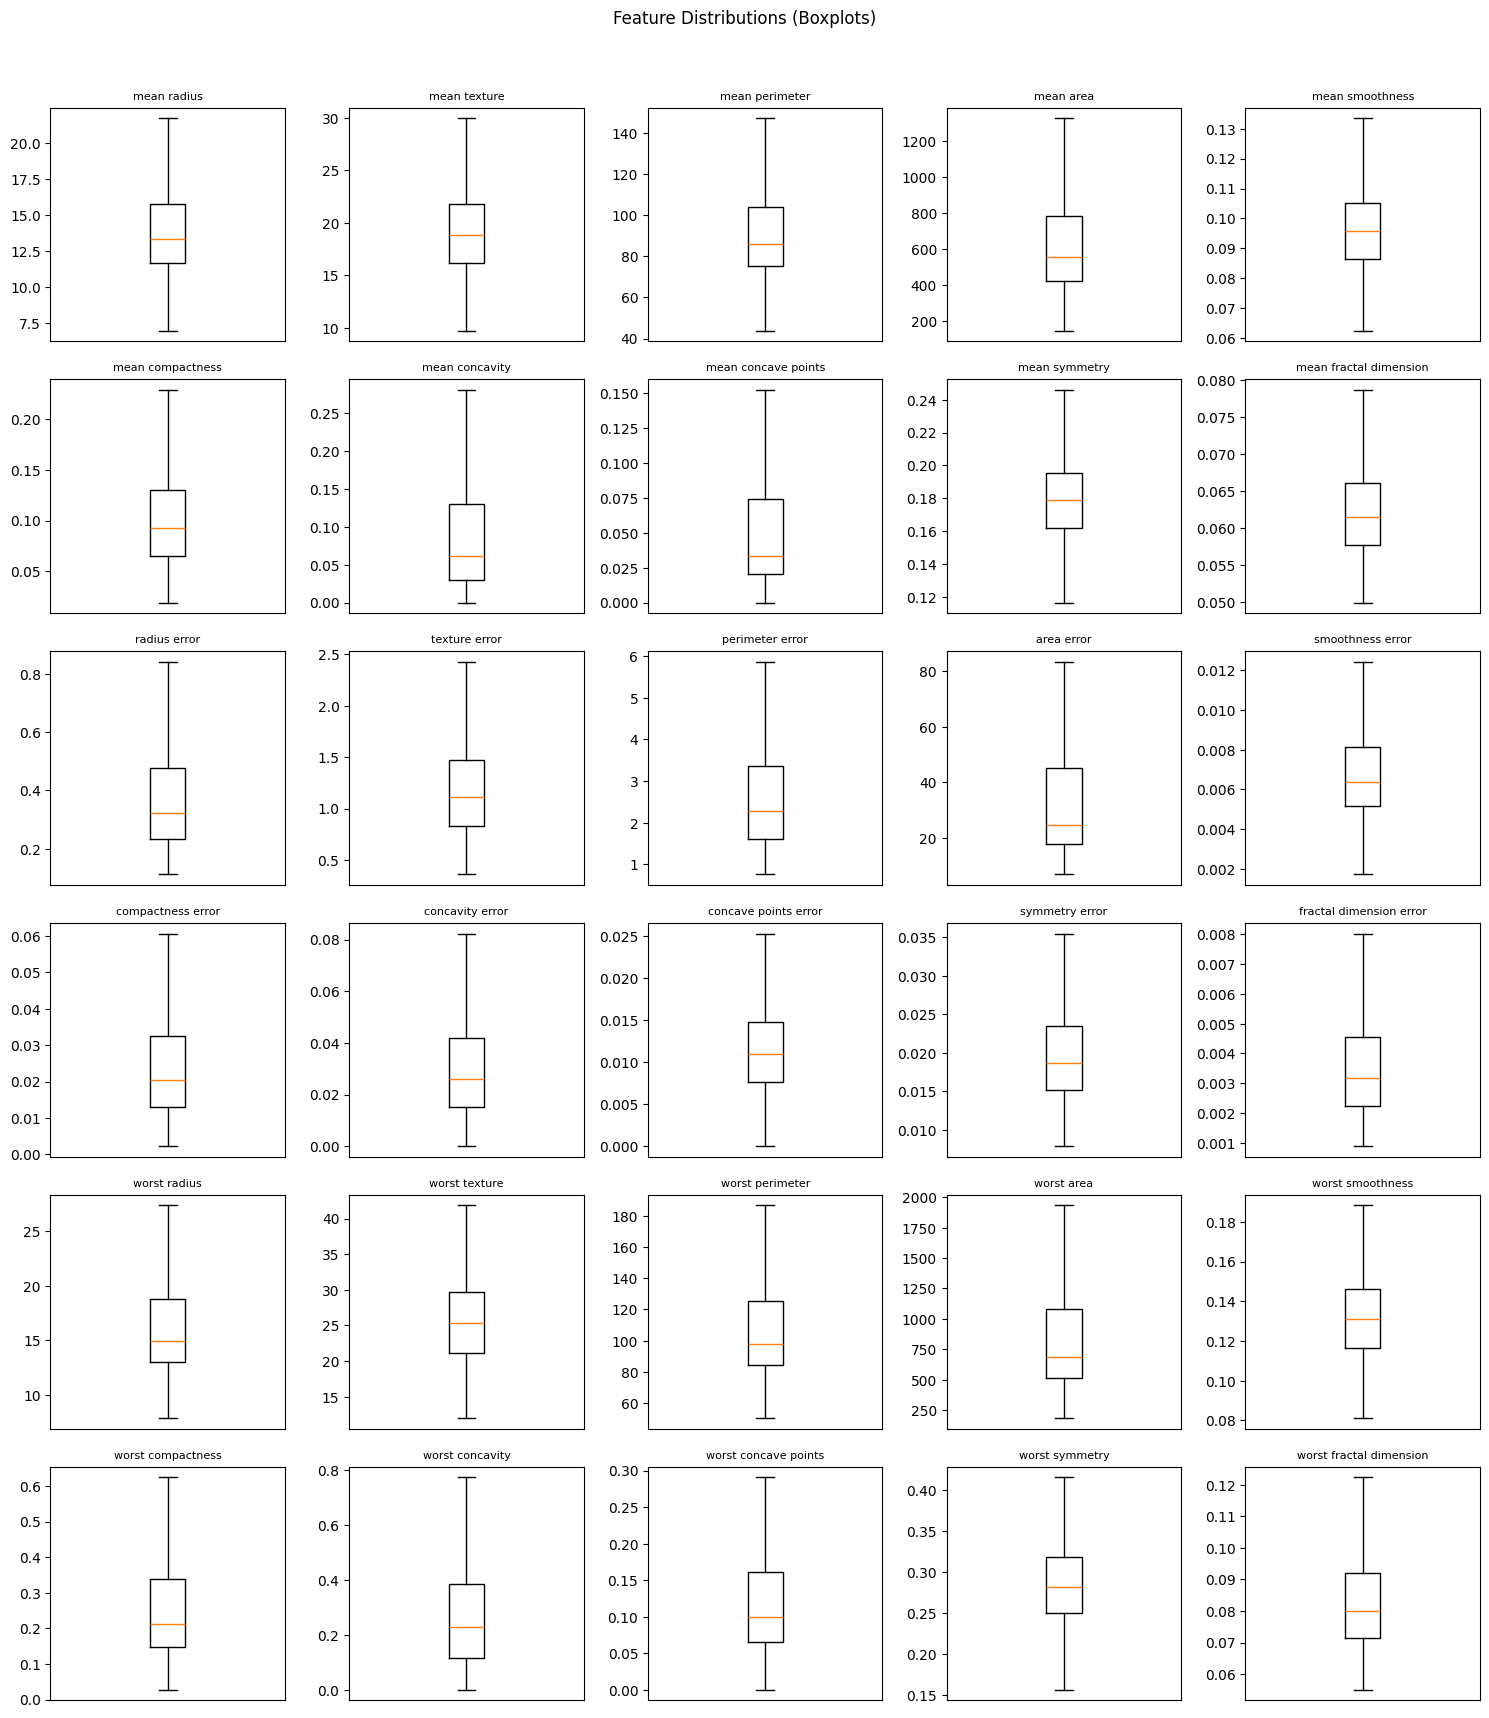

In [ ]:
# Boxplots help spot outliers/scale differences; exclude 'target'.
import math
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include="number").columns.tolist()
if "target" in num_cols: num_cols.remove("target")

n = len(num_cols); cols = 5; rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, showfliers=False)
    axes[i].set_title(col, fontsize=8)
    axes[i].set_xticks([])

for j in range(i+1, rows*cols):  # hide unused cells
    axes[j].axis("off")

fig.suptitle("Feature Distributions (Boxplots)", y=1.02)
plt.tight_layout()
plt.show()


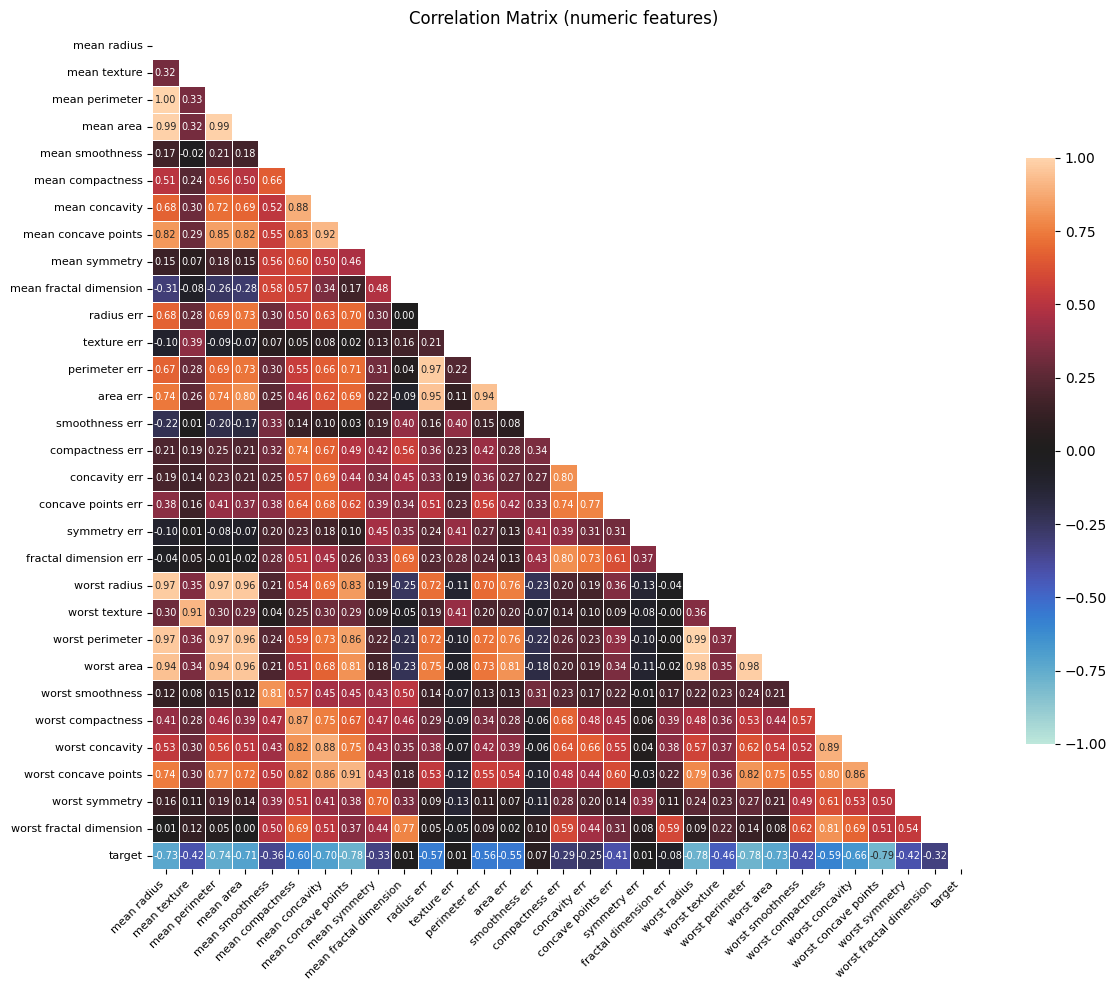

In [ ]:
# Uses all numeric columns (target included if numeric).
import seaborn as sns
import numpy as np

# Full numeric correlation (target already numeric from earlier step)
corr = df.select_dtypes(include="number").corr()

# Optional: shorten long labels to avoid overlap
short = (corr.columns
         .str.replace(" mean ", " μ ", regex=False)
         .str.replace(" worst ", " w ", regex=False)
         .str.replace(" error", " err", regex=False))
corr.index = short
corr.columns = short

# Mask upper triangle to reduce clutter (show each pair once)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    linewidths=0.5, linecolor="white",
    vmin=-1, vmax=1, center=0, square=False,
    cbar_kws={"shrink": 0.7}, annot_kws={"size": 7}
)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()


In [ ]:
# 🧹 Drop highly correlated features (>|0.95|), keep the first
# --- Setup: feature columns (exclude 'target'); numeric y for correlations ---
feat_cols = df.select_dtypes(include="number").columns.tolist()
if "target" in feat_cols:
  feat_cols.remove("target")

y_num = df["target"]
if not pd.api.types.is_numeric_dtype(y_num):
  # Map common labels; fallback to factorize if custom labels exist
  y_num = y_num.map({"malignant": 0, "benign": 1})
  if y_num.isna().any():
    y_num = pd.Series(pd.factorize(df["target"]), index=df.index)

# --- 1) Drop highly correlated features (>0.95 with any earlier feature) ---
corr = df[feat_cols].corr().abs()
upper = corr.where(np.triu(np.ones_like(corr, dtype=bool), k=1))
to_drop_high = [c for c in upper.columns if (upper[c] > 0.95).any()]

# --- 2) Drop features weakly related to label (|r(feature, y)| < 0.05) ---
r_xy = df[feat_cols].apply(lambda s: s.corr(y_num)).fillna(0.0)
to_drop_weak = r_xy.index[r_xy.abs() < 0.05].tolist()

# --- Apply to the main DataFrame ---
drop_cols = sorted(set(to_drop_high) | set(to_drop_weak))
df.drop(columns=drop_cols, inplace=True)

print(f"Dropped {len(drop_cols)} columns:", drop_cols)
print(df.shape)


Dropped 10 columns: ['area error', 'mean area', 'mean fractal dimension', 'mean perimeter', 'perimeter error', 'symmetry error', 'texture error', 'worst area', 'worst perimeter', 'worst radius']
(569, 21)


## ✂️ Train–test split (stratified, reproducible)

In [ ]:
from sklearn.model_selection import train_test_split

# Features after pruning; keep label as-is (string labels are fine)
y = df["target"]
X = df.drop(columns=["target"])

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify = y, random_state=42
)

print("Train:", X_train.shape, "Test: ", X_test.shape)
print("Train ratio:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Test ratio:", y_test.value_counts(normalize=True).round(3).to_dict())


Train: (455, 20) Test:  (114, 20)
Train ratio: {1: 0.626, 0: 0.374}
Test ratio: {1: 0.632, 0: 0.368}


## 📏 Min–Max scaling (fit on train only)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(
    max_iter=1000,
    penalty="l2",
    C=1.0,
    solver="liblinear",
    random_state=42
)

lr.fit(X_train, y_train)
print("LR F1: ", f1_score(y_test, lr.predict(X_test), pos_label=1))


LR F1:  0.9795918367346939


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() # continuous features → GaussianNB
nb.fit(X_train, y_train)
print("NB: F1", f1_score(y_test, nb.predict(X_test), pos_label=1))


NB: F1 0.9219858156028369


# k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    metric="minkowski",
    p=1
)
knn.fit(X_train, y_train)
print("KNN: F1 ", f1_score(y_test, knn.predict(X_test), pos_label=1))


KNN: F1  0.9655172413793104


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,
    random_state=42
)
svc.fit(X_train, y_train)
print("SVM F1: ", f1_score(y_test, svc.predict(X_test), pos_label=1))


SVM F1:  0.9655172413793104


# Comparison of models

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

models = {"LR": lr, "NB": nb, "KNN": knn, "SVC": svc}
pos_label = 1 if pd.api.types.is_numeric_dtype(y_test) else "malignant"

rows = []
for name, clf in models.items():
  y_pred = clf.predict(X_test)
  prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="binary", pos_label=pos_label, zero_division=0
    )
  acc = accuracy_score(y_test, y_pred)
  rows.append({"Model": name, "Recall": rec, "precision": prec, "F1": f1, "Accuracy": acc})

pd.DataFrame(rows).set_index("Model").round(3)


,Recall,precision,F1,Accuracy
Model,,,,
LR,1.000,0.960,0.980,0.974
NB,0.903,0.942,0.922,0.904
KNN,0.972,0.959,0.966,0.956
SVC,0.972,0.959,0.966,0.956
